<a href="https://colab.research.google.com/github/Oumayma-Balti/Balti-Oumayma/blob/master/Carte_de_controle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving mince_jable.csv to mince_jable (2).csv


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss


In [0]:
df =pd.read_csv('mince_jable.csv', encoding='cp1252')


In [0]:
df.head()

,SSOF,Type de Contrôle,CE,Date Prelev,LCI,LSI,Nominal,LSS,LCS,S1Int,S1Ext,S2Int,S2Ext,S3Int,S3Ext,S4Int,S4Ext,S5Int,S5Ext,S6Int,S6Ext,S7Int,S7Ext,S8Int,S8Ext,S9Int,S9Ext,S10Int,S10Ext,Moyenne,Etendu,moy_moy,moy_Etentu,Lim_contr_sup,lim_contr_inf,LCSrbar,LCIRbar,xmoymoinsxmoy,Unnamed: 38,sigmamoinstrois,sigmamoinsdeux,sigmoinsun,sigmatrois,sigmadeux,sigmaun
0,1,Epaisseur jable,NaN,7/11/2019 10:00,2.5,2.5,2.5,NaN,NaN,3.00,NaN,2.99,NaN,2.89,NaN,2.97,NaN,2.83,NaN,3.01,NaN,2.88,NaN,2.94,NaN,2.91,NaN,2.86,NaN,2.928,0.18,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.327,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
1,2,Epaisseur jable,NaN,7/11/2019 11:00,2.5,2.5,2.5,NaN,NaN,2.94,NaN,3.00,NaN,2.96,NaN,2.89,NaN,2.94,NaN,2.79,NaN,2.82,NaN,3.01,NaN,2.91,NaN,2.94,NaN,2.920,0.22,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.319,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
2,3,Epaisseur jable,NaN,7/11/2019 12:00,2.5,2.5,2.5,NaN,NaN,2.99,NaN,2.89,NaN,2.97,NaN,2.93,NaN,3.00,NaN,2.94,NaN,2.96,NaN,2.89,NaN,2.97,NaN,2.95,NaN,2.949,0.11,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.348,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
3,4,Epaisseur jable,NaN,7/11/2019 13:00,2.5,2.5,2.5,NaN,NaN,2.98,NaN,2.96,NaN,2.94,NaN,2.86,NaN,2.79,NaN,2.91,NaN,2.86,NaN,2.95,NaN,2.88,NaN,2.87,NaN,2.900,0.19,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.299,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
4,5,Epaisseur jable,NaN,7/11/2019 14:00,2.5,2.5,2.5,NaN,NaN,2.83,NaN,2.49,NaN,2.53,NaN,2.52,NaN,2.64,NaN,2.76,NaN,2.98,NaN,2.58,NaN,2.84,NaN,2.71,NaN,2.688,0.49,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.087,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637


In [0]:
df.describe()

,SSOF,CE,LCI,LSI,Nominal,LSS,LCS,S1Int,S1Ext,S2Int,S2Ext,S3Int,S3Ext,S4Int,S4Ext,S5Int,S5Ext,S6Int,S6Ext,S7Int,S7Ext,S8Int,S8Ext,S9Int,S9Ext,S10Int,S10Ext,Moyenne,Etendu,moy_moy,moy_Etentu,Lim_contr_sup,lim_contr_inf,LCSrbar,LCIRbar,xmoymoinsxmoy,Unnamed: 38,sigmamoinstrois,sigmamoinsdeux,sigmoinsun,sigmatrois,sigmadeux,sigmaun
count,650.00000,0.0,650.000000,650.000000,650.000000,0.0,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,0.0,650.000000,650.000000,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,650.000000,2.000000,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02
mean,325.50000,NaN,2.119692,2.119692,2.119692,NaN,NaN,2.526692,NaN,2.570015,NaN,2.622431,NaN,2.591015,NaN,2.575292,NaN,2.654169,NaN,2.539354,NaN,2.584354,NaN,2.622231,NaN,2.636769,NaN,2.592232,0.623554,2.601000e+00,6.098000e-01,2.788800e+00,2.413200e+00,1.083600e+00,1.360000e-01,-0.008768,3.349000,2.413100e+00,2.475700e+00,2.538400e+00,2.789000e+00,2.726300e+00,2.663700e+00
std,187.78312,NaN,0.086606,0.086606,0.086606,NaN,NaN,0.248080,NaN,0.265775,NaN,0.300484,NaN,0.251390,NaN,0.276237,NaN,0.255078,NaN,0.317581,NaN,0.296101,NaN,0.244608,NaN,0.954795,NaN,0.191512,0.997950,4.399869e-14,5.888714e-15,2.444372e-14,2.399929e-14,7.777546e-15,3.888773e-16,0.191512,1.926159,1.288852e-14,2.444375e-14,2.311045e-14,1.155523e-14,2.399931e-14,1.199966e-14
min,1.00000,NaN,2.100000,2.100000,2.100000,NaN,NaN,1.880000,NaN,1.790000,NaN,1.890000,NaN,1.750000,NaN,1.590000,NaN,1.950000,NaN,1.790000,NaN,1.850000,NaN,1.800000,NaN,1.800000,NaN,1.987000,0.060000,2.601000e+00,6.098000e-01,2.788800e+00,2.413200e+00,1.083600e+00,1.360000e-01,-0.614000,1.987000,2.413100e+00,2.475700e+00,2.538400e+00,2.789000e+00,2.726300e+00,2.663700e+00
25%,163.25000,NaN,2.100000,2.100000,2.100000,NaN,NaN,2.360000,NaN,2.390000,NaN,2.470000,NaN,2.450000,NaN,2.430000,NaN,2.510000,NaN,2.370000,NaN,2.435000,NaN,2.490000,NaN,2.470000,NaN,2.469000,0.320000,2.601000e+00,6.098000e-01,2.788800e+00,2.413200e+00,1.083600e+00,1.360000e-01,-0.132000,2.668000,2.413100e+00,2.475700e+00,2.538400e+00,2.789000e+00,2.726300e+00,2.663700e+00
50%,325.50000,NaN,2.100000,2.100000,2.100000,NaN,NaN,2.540000,NaN,2.580000,NaN,2.605000,NaN,2.610000,NaN,2.590000,NaN,2.630000,NaN,2.570000,NaN,2.620000,NaN,2.620000,NaN,2.620000,NaN,2.588500,0.530000,2.601000e+00,6.098000e-01,2.788800e+00,2.413200e+00,1.083600e+00,1.360000e-01,-0.012500,3.349000,2.413100e+00,2.475700e+00,2.538400e+00,2.789000e+00,2.726300e+00,2.663700e+00
75%,487.75000,NaN,2.100000,2.100000,2.100000,NaN,NaN,2.650000,NaN,2.710000,NaN,2.780000,NaN,2.740000,NaN,2.740000,NaN,2.790000,NaN,2.730000,NaN,2.757500,NaN,2.767500,NaN,2.750000,NaN,2.704000,0.790000,2.601000e+00,6.098000e-01,2.788800e+00,2.413200e+00,1.083600e+00,1.360000e-01,0.103000,4.030000,2.413100e+00,2.475700e+00,2.538400e+00,2.789000e+00,2.726300e+00,2.663700e+00
max,650.00000,NaN,2.500000,2.500000,2.500000,NaN,NaN,3.370000,NaN,3.400000,NaN,6.430000,NaN,3.240000,NaN,3.970000,NaN,3.630000,NaN,5.780000,NaN,3.750000,NaN,3.550000,NaN,26.000000,NaN,4.711000,24.110000,2.601000e+00,6.098000e-01,2.788800e+00,2.413200e+00,1.083600e+00,1.360000e-01,2.110000,4.711000,2.413100e+00,2.475700e+00,2.538400e+00,2.789000e+00,2.726300e+00,2.663700e+00


Visualisation de la tendance de l'indicateur mince de jable

In [0]:
df.isnull()

,SSOF,Type de Contrôle,CE,Date Prelev,LCI,LSI,Nominal,LSS,LCS,S1Int,S1Ext,S2Int,S2Ext,S3Int,S3Ext,S4Int,S4Ext,S5Int,S5Ext,S6Int,S6Ext,S7Int,S7Ext,S8Int,S8Ext,S9Int,S9Ext,S10Int,S10Ext,Moyenne,Etendu,moy_moy,moy_Etentu,Lim contr sup,lim contr inf,LCSrbar,LCIRbar,xmoymoinsxmoy,Unnamed: 38,sigmamoinstrois,sigmamoinsdeux,sigmoinsun,sigmatrois,sigmadeux,sigmaun
0,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
646,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
647,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
648,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


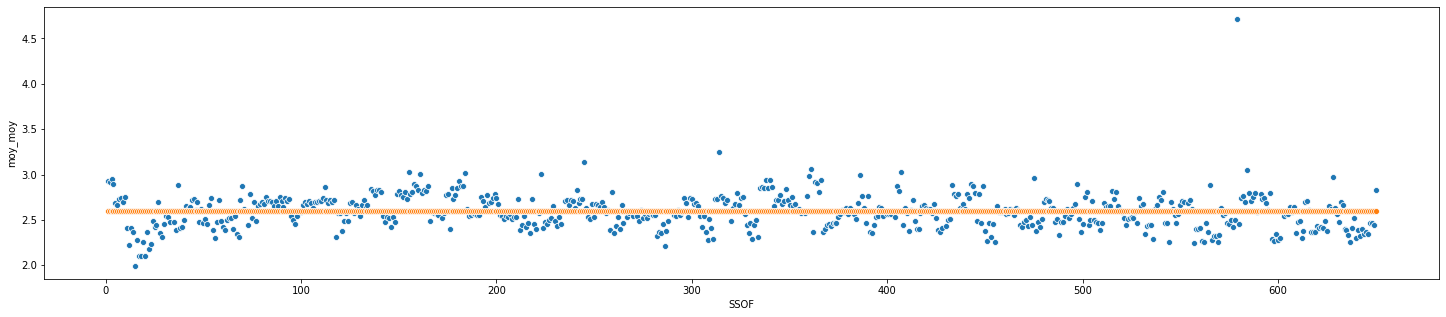

In [0]:
plt.figure(figsize=(25,5))
sns.scatterplot(data= df , x= "SSOF",y="Moyenne")
sns.scatterplot(data= df , x= "SSOF",y="moy_moy")


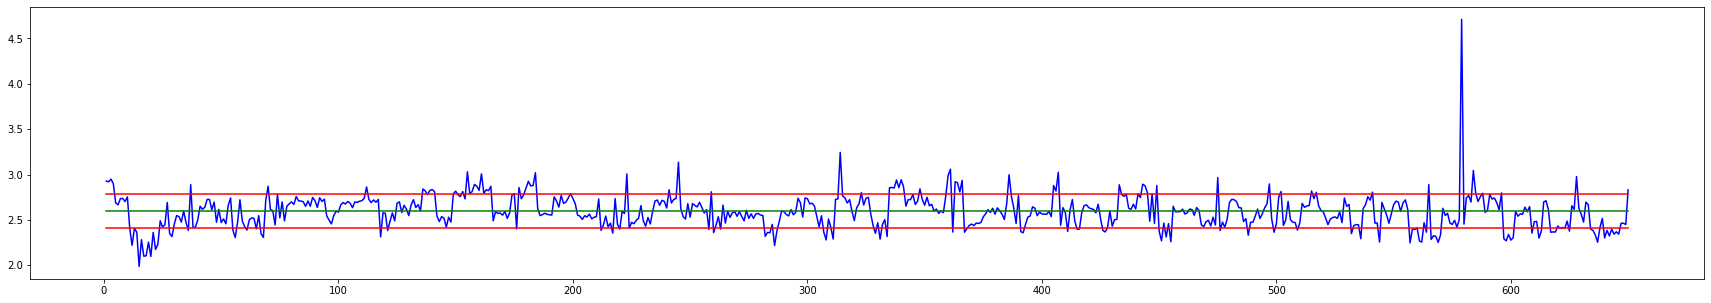

In [0]:
from pylab import *
plt.figure(figsize=(30,5))
plot(df.SSOF,df.Moyenne ,'b')
plot(df.SSOF,df.moy_moy,'g' )
plot( df.SSOF,df.lim_contr_inf ,'r')
plot(df.SSOF,df.Lim_contr_sup,'r')

In [0]:
df.tail(5)

,SSOF,Type de Contrôle,CE,Date Prelev,LCI,LSI,Nominal,LSS,LCS,S1Int,S1Ext,S2Int,S2Ext,S3Int,S3Ext,S4Int,S4Ext,S5Int,S5Ext,S6Int,S6Ext,S7Int,S7Ext,S8Int,S8Ext,S9Int,S9Ext,S10Int,S10Ext,Moyenne,Etendu,moy_moy,moy_Etentu,Lim_contr_sup,lim_contr_inf,LCSrbar,LCIRbar,xmoymoinsxmoy,Unnamed: 38,sigmamoinstrois,sigmamoinsdeux,sigmoinsun,sigmatrois,sigmadeux,sigmaun
645,646,Epaisseur jable,NaN,6/12/2019 3:00,2.1,2.1,2.1,NaN,NaN,2.35,NaN,2.49,NaN,2.53,NaN,2.36,NaN,2.31,NaN,2.28,NaN,2.30,NaN,1.91,NaN,2.41,NaN,2.49,NaN,2.343,0.62,2.601,0.6098,2.7888,2.4132,1.0836,0.136,-0.258,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
646,647,Epaisseur jable,NaN,6/12/2019 4:00,2.1,2.1,2.1,NaN,NaN,2.64,NaN,2.59,NaN,2.61,NaN,2.34,NaN,2.47,NaN,2.45,NaN,2.49,NaN,1.98,NaN,2.38,NaN,2.67,NaN,2.462,0.69,2.601,0.6098,2.7888,2.4132,1.0836,0.136,-0.139,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
647,648,Epaisseur jable,NaN,6/12/2019 5:00,2.1,2.1,2.1,NaN,NaN,2.46,NaN,2.39,NaN,2.41,NaN,2.49,NaN,2.51,NaN,2.56,NaN,2.57,NaN,2.31,NaN,2.41,NaN,2.53,NaN,2.464,0.26,2.601,0.6098,2.7888,2.4132,1.0836,0.136,-0.137,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
648,649,Epaisseur jable,NaN,6/12/2019 6:00,2.1,2.1,2.1,NaN,NaN,2.64,NaN,2.57,NaN,2.31,NaN,2.29,NaN,2.46,NaN,2.52,NaN,2.47,NaN,2.43,NaN,2.37,NaN,2.43,NaN,2.449,0.35,2.601,0.6098,2.7888,2.4132,1.0836,0.136,-0.152,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637
649,650,Epaisseur jable,NaN,6/12/2019 7:00,2.1,2.1,2.1,NaN,NaN,2.65,NaN,2.85,NaN,2.96,NaN,2.74,NaN,2.68,NaN,2.98,NaN,2.74,NaN,3.01,NaN,2.74,NaN,2.96,NaN,2.831,0.36,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN


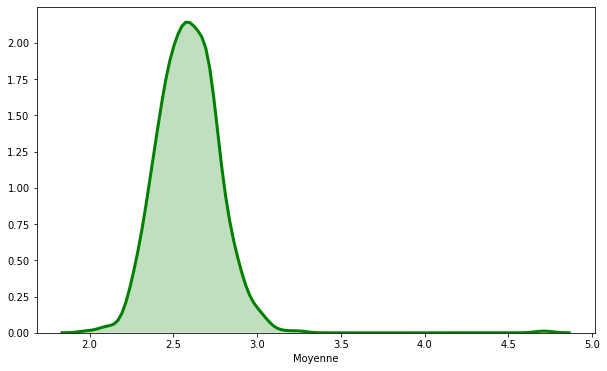

In [0]:

plt.figure(figsize=(10, 6))
sns.distplot(df['Moyenne'], hist=False, kde=True, 
              color = 'green',
             kde_kws={'linewidth': 3,'shade': True,})

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import time

In [0]:
from sklearn import preprocessing
#LeCity = preprocessing.LabelEncoder()
#LeRegion = preprocessing.LabelEncoder()

In [0]:
Cat_Col=['Type de Contrôle']
Num_Col = ['Moyenne','moy_moy','Lim contr sup','lim contr inf	']

In [0]:
Pipeline =ColumnTransformer([("num",StandardScaler(),Num_Col),("cat",OrdinalEncoder(),Cat_Col)])

In [0]:
df0=df.drop('Moyenne')


KeyError: ignored

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [0]:
x_train = Pipeline.fit_transform(x_train)
x_test= Pipeline.transform(x_test)

ValueError: ignored

In [0]:
mean_rate = df['Moyenne'].mean()
print(mean_rate)
stdev_rate = df['Moyenne'].std(ddof=0)
print(stdev_rate)



2.592232307692307
0.19136444457767146


In [0]:
zscore_rate = ss.zscore(df['Moyenne'], ddof=0)
df = df.assign(zscore=zscore_rate)
df.head(8)

,SSOF,Type de Contrôle,CE,Date Prelev,LCI,LSI,Nominal,LSS,LCS,S1Int,S1Ext,S2Int,S2Ext,S3Int,S3Ext,S4Int,S4Ext,S5Int,S5Ext,S6Int,S6Ext,S7Int,S7Ext,S8Int,S8Ext,S9Int,S9Ext,S10Int,S10Ext,Moyenne,Etendu,moy_moy,moy_Etentu,Lim_contr_sup,lim_contr_inf,LCSrbar,LCIRbar,xmoymoinsxmoy,Unnamed: 38,sigmamoinstrois,sigmamoinsdeux,sigmoinsun,sigmatrois,sigmadeux,sigmaun,zscore
0,1,Epaisseur jable,NaN,7/11/2019 10:00,2.5,2.5,2.5,NaN,NaN,3.00,NaN,2.99,NaN,2.89,NaN,2.97,NaN,2.83,NaN,3.01,NaN,2.88,NaN,2.94,NaN,2.91,NaN,2.86,NaN,2.928,0.18,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.327,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,1.754598
1,2,Epaisseur jable,NaN,7/11/2019 11:00,2.5,2.5,2.5,NaN,NaN,2.94,NaN,3.00,NaN,2.96,NaN,2.89,NaN,2.94,NaN,2.79,NaN,2.82,NaN,3.01,NaN,2.91,NaN,2.94,NaN,2.920,0.22,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.319,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,1.712793
2,3,Epaisseur jable,NaN,7/11/2019 12:00,2.5,2.5,2.5,NaN,NaN,2.99,NaN,2.89,NaN,2.97,NaN,2.93,NaN,3.00,NaN,2.94,NaN,2.96,NaN,2.89,NaN,2.97,NaN,2.95,NaN,2.949,0.11,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.348,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,1.864336
3,4,Epaisseur jable,NaN,7/11/2019 13:00,2.5,2.5,2.5,NaN,NaN,2.98,NaN,2.96,NaN,2.94,NaN,2.86,NaN,2.79,NaN,2.91,NaN,2.86,NaN,2.95,NaN,2.88,NaN,2.87,NaN,2.900,0.19,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.299,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,1.608280
4,5,Epaisseur jable,NaN,7/11/2019 14:00,2.5,2.5,2.5,NaN,NaN,2.83,NaN,2.49,NaN,2.53,NaN,2.52,NaN,2.64,NaN,2.76,NaN,2.98,NaN,2.58,NaN,2.84,NaN,2.71,NaN,2.688,0.49,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.087,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,0.500447
5,6,Epaisseur jable,NaN,7/11/2019 15:00,2.5,2.5,2.5,NaN,NaN,2.71,NaN,2.65,NaN,2.42,NaN,2.44,NaN,2.57,NaN,2.69,NaN,3.05,NaN,2.63,NaN,2.88,NaN,2.62,NaN,2.666,0.63,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.065,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,0.385483
6,7,Epaisseur jable,NaN,7/11/2019 16:00,2.5,2.5,2.5,NaN,NaN,2.52,NaN,2.59,NaN,2.93,NaN,2.54,NaN,3.01,NaN,2.58,NaN,2.64,NaN,2.85,NaN,2.94,NaN,2.74,NaN,2.734,0.49,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.133,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,0.740826
7,8,Epaisseur jable,NaN,7/11/2019 17:00,2.5,2.5,2.5,NaN,NaN,2.53,NaN,2.59,NaN,2.85,NaN,2.57,NaN,2.81,NaN,2.59,NaN,2.74,NaN,2.96,NaN,2.84,NaN,2.89,NaN,2.737,0.43,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.136,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,0.756503


In [0]:
from pylab import *
def plot_anomaly(data_score,LCI, LCS):
  
    data_score =df['Moyenne'].copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(df.Moyenne), len(df.Moyenne))
    mask_outlier = (df.Moyenne > LCS)
    mask_outlier =  ( data_score <LCI)
    
    
    plt.figure(figsize=(30,5))
    plt.plot(ranks[~mask_outlier], data_score[~mask_outlier],'o', color='b',label='OK schools')
    plt.plot(ranks[mask_outlier], data_score[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(LCS,color='r',label='LCS', alpha=0.5)
    plt.axhline(LCI,color='r',label='LCI', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score ', fontweight='bold')
    plt.xlabel('Ranked School district')
    plt.ylabel('Z-score')
    plt.show()


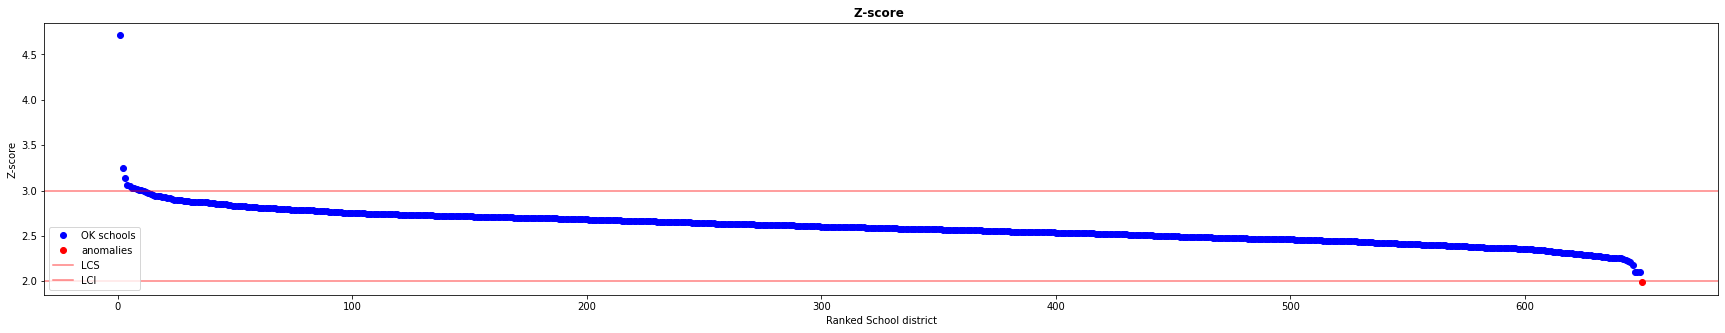

In [0]:
plot_anomaly(df['zscore'],2, 3)


In [0]:
zscore_anomalies = df[(df['zscore'] < 2) ]
zscore_anomalies = df[(df['zscore'] >3) ]
zscore_anomalies

,SSOF,Type de Contrôle,CE,Date Prelev,LCI,LSI,Nominal,LSS,LCS,S1Int,S1Ext,S2Int,S2Ext,S3Int,S3Ext,S4Int,S4Ext,S5Int,S5Ext,S6Int,S6Ext,S7Int,S7Ext,S8Int,S8Ext,S9Int,S9Ext,S10Int,S10Ext,Moyenne,Etendu,moy_moy,moy_Etentu,Lim_contr_sup,lim_contr_inf,LCSrbar,LCIRbar,xmoymoinsxmoy,Unnamed: 38,sigmamoinstrois,sigmamoinsdeux,sigmoinsun,sigmatrois,sigmadeux,sigmaun,zscore
313,314,Epaisseur jable,NaN,21/11/2019 8:15,2.1,2.1,2.1,NaN,NaN,3.24,NaN,3.25,NaN,3.14,NaN,2.99,NaN,3.97,NaN,3.25,NaN,3.14,NaN,3.05,NaN,3.27,NaN,3.14,NaN,3.244,0.98,2.601,0.6098,2.7888,2.4132,1.0836,0.136,0.643,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,3.405898
578,579,Epaisseur jable,NaN,3/12/2019 4:00,2.1,2.1,2.1,NaN,NaN,2.36,NaN,2.13,NaN,2.25,NaN,2.53,NaN,2.62,NaN,2.52,NaN,1.89,NaN,2.25,NaN,2.56,NaN,26.00,NaN,4.711,24.11,2.601,0.6098,2.7888,2.4132,1.0836,0.136,2.110,NaN,2.4131,2.4757,2.5384,2.789,2.7263,2.6637,11.071898


In [0]:
def depassement(data):
  if df[(df['zscore'] < 2) ]:
   print('Dépassement de limite ==> Passage hors controle>>>>Il doit effectuer une maintenace corrective')
  elif df[(df['zscore'] >3) ]:
   print('Dépassement de limite ==> Passage hors controle <<<Maintenance Corrective>>>')

ValueError: ignored